In [51]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import time

# punto 3

In [ ]:
class Fibonacci:
    def __init__(self, n):
        self.n = n
        self.a, self.b = 0, 1
        self.current = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current >= self.n:
            raise StopIteration
        else:
            result = self.a
            self.a, self.b = self.b, self.a + self.b
            self.current += 1
            return result

n = int(input("Ingrese el número final para calcular Fibonacci: "))

if n < 0:
    print("El número final debe ser mayor o igual a 0")
else:
    fib = Fibonacci(n)
    for value in fib:
        print(value)
        time.sleep(5)


# punto 4

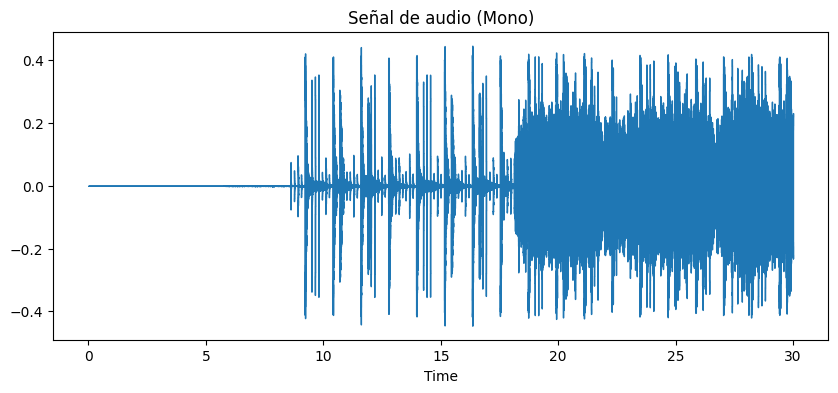

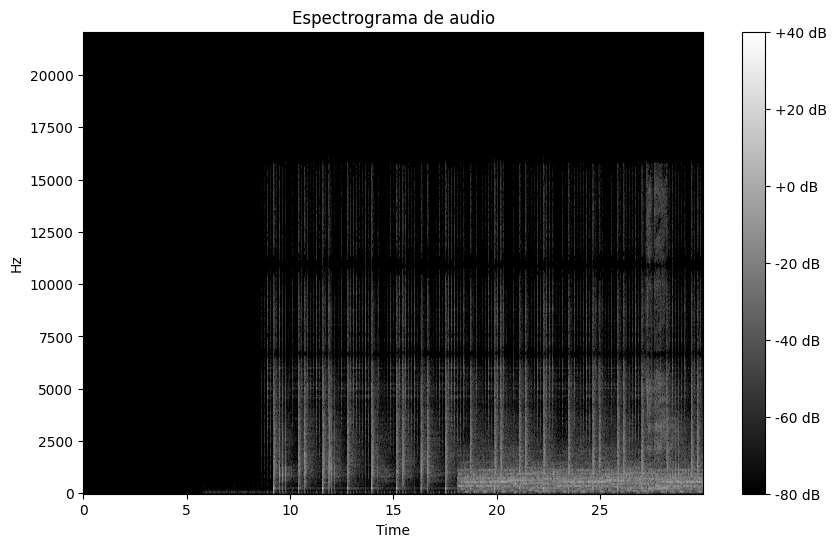

In [1]:
class Audioruta:
    def __init__(self, ruta_archivo):
        self.audio, self.sr = librosa.load(ruta_archivo, sr=None)
        self.audio = self.audio[:int(self.sr * 30)]

    def graficar_senal(self, mono=True):
        plt.figure(figsize=(10, 4))
        if mono:
            plt.title('Señal de audio (Mono)')
            librosa.display.waveshow(self.audio, sr=self.sr)
        else:
            plt.subplot(2, 1, 1)
            plt.title('Canal Izquierdo')
            librosa.display.waveshow(self.audio[0], sr=self.sr)
            plt.subplot(2, 1, 2)
            plt.title('Canal Derecho')
            librosa.display.waveshow(self.audio[1], sr=self.sr)
        plt.show()

    def graficar_espectrograma(self, escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        plt.figure(figsize=(10, 6))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    def guardar_espectrograma(self, nombre_archivo="espectrograma_default.png", escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(nombre_archivo)
        plt.close()

ruta_archivo = '/content/audio_parcial.mp3'
audio = Audioruta(ruta_archivo)
audio.graficar_senal(mono=True)
audio.graficar_espectrograma(escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)
audio.guardar_espectrograma("espectrograma.png", escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)


# punto 5

Arroz: $1000
Frijoles: $3000
Aceite: $5000
Leche: $3000
Huevos: $2000
Cocacola: $50000
Carne: $18000
El precio del Arroz es: 1000
Se han vendido 2 Arroz(s).
Se han vendido 3 Frijoles(s).


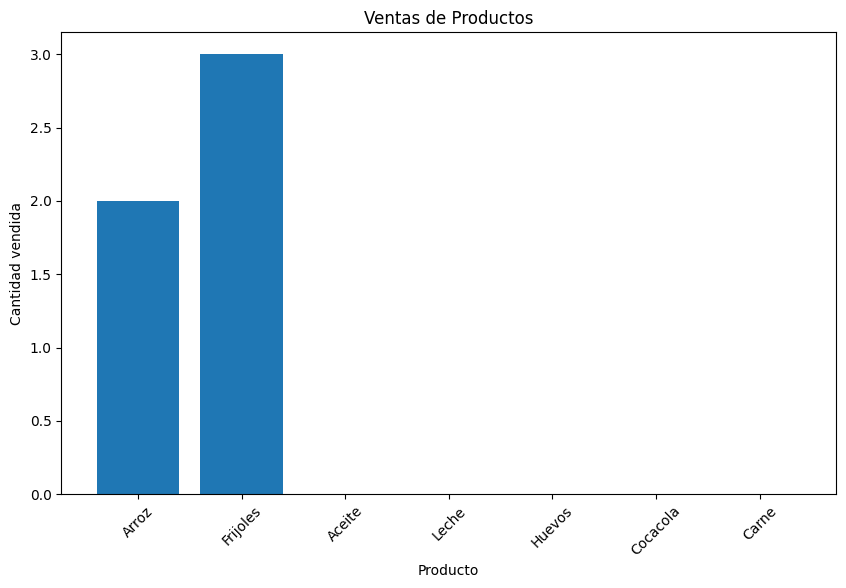

Ventas totales: $ 10987
Frijoles: $2997
Aceite: $5000
Leche: $3000
Huevos: $2000
Carne: $18000


In [52]:
class Tienda:
    def __init__(self):
        self.inventario = {}
        self.ventas_productos = {}
        self.ventas_totales = 0

    def agregar_producto(self, nombre, precio):
        self.inventario[nombre] = precio
        self.ventas_productos[nombre] = 0

    def eliminar_producto(self, nombre):
        if nombre in self.inventario:
            del self.inventario[nombre]
            del self.ventas_productos[nombre]
        else:
            print(f"{nombre} no se encuentra en el inventario")

    def obtener_precio(self, nombre):
        if nombre in self.inventario:
            return self.inventario[nombre]
        else:
            print(f"{nombre} no se encuentra en el inventario")
            return None

    def mostrar_inventario(self):
        for producto, precio in self.inventario.items():
            print(f"{producto}: ${precio}")

    def vender_producto(self, nombre, cantidad):
        if nombre in self.inventario:
            if cantidad <= 0:
                print("La cantidad debe ser mayor que cero.")
            elif cantidad > 0 and cantidad <= self.inventario[nombre]:
                self.inventario[nombre] -= cantidad
                self.ventas_productos[nombre] += cantidad
                self.ventas_totales += self.inventario[nombre] * cantidad
                print(f"Se han vendido {cantidad} {nombre}(s).")
            else:
                print(f"No hay suficiente stock de {nombre} para vender {cantidad}.")
        else:
            print(f"{nombre} no se encuentra en el inventario")

    def agregar_stock(self, nombre, cantidad):
        if nombre in self.inventario:
            if cantidad <= 0:
                print("La cantidad debe ser mayor que cero.")
            else:
                self.inventario[nombre] += cantidad
                print(f"Se han agregado {cantidad} {nombre}(s) al inventario.")
        else:
            print(f"{nombre} no se encuentra en el inventario")

    def mostrar_grafica_ventas(self):
        productos_vendidos = list(self.ventas_productos.keys())
        cantidades_vendidas = list(self.ventas_productos.values())

        plt.figure(figsize=(10, 6))
        plt.bar(productos_vendidos, cantidades_vendidas)
        plt.xlabel("Producto")
        plt.ylabel("Cantidad vendida")
        plt.title("Ventas de Productos")
        plt.xticks(rotation=45)
        plt.show()

mi_tienda = Tienda()
mi_tienda.agregar_producto("Arroz", 1000)
mi_tienda.agregar_producto("Frijoles", 3000)
mi_tienda.agregar_producto("Aceite", 5000)
mi_tienda.agregar_producto("Leche", 3000)
mi_tienda.agregar_producto("Huevos", 2000)
mi_tienda.agregar_producto("Cocacola", 50000)
mi_tienda.agregar_producto("Carne", 18000)
mi_tienda.mostrar_inventario()
print("El precio del Arroz es:", mi_tienda.obtener_precio("Arroz"))
mi_tienda.vender_producto("Arroz", 2)
#mi_tienda.vender_producto("Leche", 3)
#mi_tienda.vender_producto("Frijoles", 1)
mi_tienda.vender_producto("Frijoles", 3)
#mi_tienda.mostrar_inventario()
#mi_tienda.eliminar_producto("Cocacola")
mi_tienda.mostrar_grafica_ventas()
print("Ventas totales: $", mi_tienda.ventas_totales)  # Muestra las ventas totales
mi_tienda.eliminar_producto("Cocacola")
mi_tienda.eliminar_producto("Arroz")
mi_tienda.mostrar_inventario()